# Figures
by: J Plumlee 
2023-03-09

In [38]:
#For the plots
library(ggplot2)
library(dplyr)
library(tidyr) 
library(mgcv)
library(lubridate)

ERROR: Error in library(dplyr): there is no package called ‘dplyr’


In [24]:
#Read the file
dirname <- getwd()
filename <- 'all_species_enviro.csv'
df <- read.csv(file.path(dirname,filename))
cat("File",filename,"has",nrow(df),"rows,",ncol(df),"columns")

File all_species_enviro.csv has 626 rows, 53 columns

## Pelagic
`p_prey` = Pelagic prey excluding Butterfish, omit `NaN`

In [26]:
#Benthic Prey except Mojarra
b_prey <- df[df$group == "Benthic Prey",]
nrow(b_prey)
b_prey <- na.omit(b_prey[b_prey$species != "Mojarra",])
nrow(b_prey)

[1] 164

[1] 128

## Benthic
`b_prey` = Benthic prey excluding Mojarra, omit `NaN`

In [26]:
#Benthic Prey except Mojarra
b_prey <- df[df$group == "Benthic Prey",]
nrow(b_prey)
b_prey <- na.omit(b_prey[b_prey$species != "Mojarra",])
nrow(b_prey)

[1] 164

[1] 128

## Fishery Species

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1:  hat does
         ^


## Huh?

In [36]:
#What does factor do?
p_prey$species <- factor(p_prey$species, levels = c("Atlantic Bumper", "Striped Anchovy", "Finger Anchovy", "Gulf Menhaden", "Bay Anchovy", "Striped Mullet"))
p_prey$season <- factor(p_prey$season, levels = c("Spring", "Summer", "Fall"))

## And...make a plot

Warning message in p_prey$decade == c("2000", "2010"):
“longer object length is not a multiple of shorter object length”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


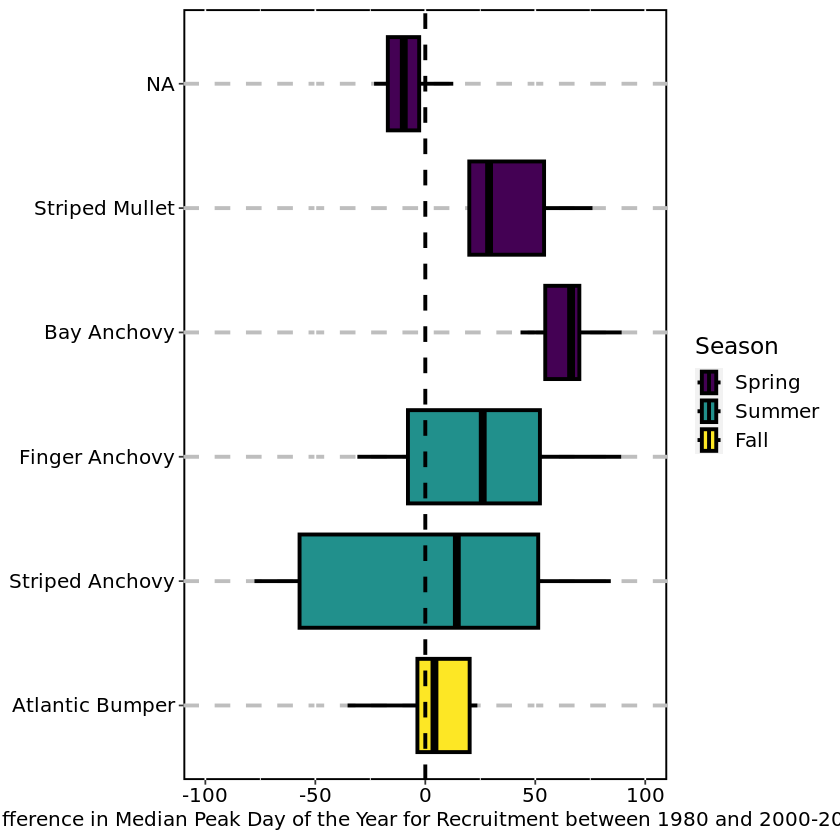

In [37]:
ggplot(p_prey[p_prey$decade == c("2000", "2010"),], aes(y = species, x = diff_median, fill = season)) +
  geom_boxplot(outlier.shape = NA, size = 1.1, color = "black") +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", size = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Median Peak Day of the Year for Recruitment between 1980 and 2000-2020", fill = "Season") +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", size = 1.10, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))